# Mahdeen Khan (Sameer)

## Homework Assignment 5: Finetuning Stable Diffusion for Naruto Image Generation

In this assignment, we’re going to finetune a pretrained Stable Diffusion model to create images based on Naruto-themed prompts. We’ll use the "small-stable-diffusion-v0" model and a dataset of Naruto-related captions. By the end, our model should generate awesome Naruto-style images from text prompts.

### Steps to Follow:

1. **Model & Dataset Setup:**
   - **Pretrained Model:** We’re using "OFA-Sys/small-stable-diffusion-v0," which is perfect for environments with limited GPU memory.
   - **Dataset:** We’ll use the "lambdalabs/naruto-blip-captions" dataset, which has captions related to the Naruto universe. This will train our model to generate matching images.

2. **Loading the Model:**
   - We’ll load all parts of the Stable Diffusion model, including the VAE, UNet, text encoder, and scheduler. These are essential for finetuning.
   - **Model ID:** `model_id = "OFA-Sys/small-stable-diffusion-v0"`

3. **Data Preprocessing:**
   - We’ll resize all images to 512x512 pixels and apply necessary transformations like normalization. We might also add some augmentations, like flips or rotations, to diversify the training data.

4. **Finetuning the Model:**
   - We’ll pick a batch size that fits our GPU. If we hit memory issues, we’ll adjust accordingly.
   - **Scheduler:** We’ll use the `PNDMScheduler` from Hugging Face’s `diffusers` library to optimize training.
   - During training, we’ll fine-tune the model on the Naruto dataset, focusing on improving the model’s ability to generate Naruto-themed images.

5. **Generating Images:**
   - Once training is done, we’ll generate 10 images:
     - 5 images using prompts from the dataset.
     - 5 images from our own custom prompts to see how versatile the model is.

### Tips:
- For guidance, check out resources like [Basic Training with Diffusers](https://huggingface.co/docs/diffusers/main/en/tutorials/basic_training) and [Stable Diffusion Blog Post](https://huggingface.co/blog/stable_diffusion).
- We’ll need to write our own training scripts, but these resources can help us get started.


# Concept Mapping:

### 1. **Project Overview**
   - **Goal:** Finetune a pretrained Stable Diffusion model to generate Naruto-themed images based on text prompts.

### 2. **Model & Dataset Setup**
   - **Pretrained Model:**
     - Model Name: `"OFA-Sys/small-stable-diffusion-v0"`
     - Purpose: Ideal for environments with limited GPU memory.
   - **Dataset:**
     - Dataset Name: `"lambdalabs/naruto-blip-captions"`
     - Purpose: Provides captions related to the Naruto universe to train the model.

### 3. **Loading the Model**
   - **Model Components:**
     - **VAE:** Variational Autoencoder for image generation.
     - **UNet:** The neural network architecture for image denoising.
     - **Text Encoder:** Converts text prompts into embeddings for the model.
     - **Scheduler:** Manages the optimization process during training.
   - **Model ID:**
     - `"OFA-Sys/small-stable-diffusion-v0"`

### 4. **Data Preprocessing**
   - **Image Resizing:**
     - Resize all images to 512x512 pixels to match the model's input requirements.
   - **Transformations:**
     - **Normalization:** Adjust pixel values to standardize the dataset.
     - **Augmentations:** Optionally apply flips, rotations, or other techniques to diversify the training data.

### 5. **Finetuning the Model**
   - **Batch Size Selection:**
     - Choose a batch size that fits within GPU memory limits, adjusting as needed.
   - **Scheduler:**
     - Use the `PNDMScheduler` from Hugging Face’s `diffusers` library for optimizing training.
   - **Training Focus:**
     - Fine-tune the model specifically on the Naruto dataset to improve its ability to generate Naruto-themed images.

### 6. **Generating Images**
   - **Post-Training Image Generation:**
     - Generate a total of 10 images:
       - **5 Images from Dataset Prompts:** Use prompts from the Naruto dataset.
       - **5 Images from Custom Prompts:** Create your own Naruto-themed prompts to test the model's versatility.

### 7. **Tips and Resources**
   - **Guidance Resources:**
     - [Basic Training with Diffusers](https://huggingface.co/docs/diffusers/main/en/tutorials/basic_training)
     - [Stable Diffusion Blog Post](https://huggingface.co/blog/stable_diffusion)
   - **Training Scripts:**
     - Write custom scripts for the training process, using the above resources as references.

This tree structure should help us systematically approach each step of the assignment, ensuring that the model is effectively fine-tuned to generate high-quality Naruto-themed images.


Also Note: 

The PNDMScheduler guides the iterative denoising process in diffusion models, improving the efficiency and quality of image generation by predicting and managing noise removal at each step. It achieves this by combining predictions from multiple previous timesteps to make more accurate noise estimates, thus allowing for fewer steps and smoother noise removal during the denoising process.

Here we go! Another Homework! As we already know, the purpose of this homework is to finetune a Stable Diffusion model to generate Naruto-themed images based on text prompts. 

So, let's start by importing essential libraries like PyTorch for deep learning operations, `DataLoader` for efficient data batching, and `transforms` for image preprocessing. We load our Naruto caption dataset using `load_dataset` and prepare the data for training. Key components of the Stable Diffusion model, such as the `UNet2DConditionModel` for image generation, `AutoencoderKL` for compressing and decompressing images, and `PNDMScheduler` for managing noise levels during image generation, are then initialized. We use the `CLIPTextModel` and `CLIPTokenizer` to convert text prompts into a format the model can understand. The optimizer, `AdamW`, is set up to adjust the model's weights during training, and `tqdm` is employed to track the training progress with a handy progress bar. Together, these steps prepare us to train a model that can creatively generate Naruto-themed images from text inputs.

In [1]:
import torch  # PyTorch for building and training models
from torch.utils.data import DataLoader  # DataLoader for batching datasets
from torchvision import transforms  # Image preprocessing (e.g., resizing, normalization)
from datasets import load_dataset  # Load datasets from Hugging Face
from diffusers import StableDiffusionPipeline, UNet2DConditionModel, PNDMScheduler  # Components for Stable Diffusion and scheduling
from transformers import CLIPTextModel, CLIPTokenizer  # CLIP for text embeddings and tokenization
from diffusers import AutoencoderKL  # Autoencoder for image encoding/decoding in latent space
from diffusers import DDPMScheduler  # Another scheduler for the diffusion process
from torch.optim import AdamW  # AdamW optimizer for model training
from tqdm.auto import tqdm  # Progress bars for loops (e.g., training)


We then selected these hyperparameters to balance training efficiency, model performance, and how much of our computational resources we use during fine-tuning. 

I started with asking CHATGPT what parameters are doable and then rechecking with the class notebook, we chose a learning rate of `5e-5` to keep our weight updates steady and prevent any wild fluctuations in learning. Since Stable Diffusion models are pretty demanding on memory, we went with a batch size of 4, which works well with our hardware. 

It was taking too much time for epoch! TOO TOO MUCH! Due to lack of time, I believe (for now) running the model for 3 epochs gives it enough time to learn from the dataset without running the risk of overfitting, and by accumulating gradients over 4 steps, we can simulate a larger batch size without overwhelming our system. The latent scaling factor of `0.18215` is a common choice in diffusion models, but I tried 0.18, 0.19, 0.2 helping us keep the latent vectors within a range the model can handle. We set `1000` training timesteps to strike a good balance between the quality of the noise handling and the time it takes to run the training. Validating the model after every epoch helps us keep an eye on its progress, and sticking to a 512x512 image size **(was also suggested)** ensures we're working with a resolution that’s just right for Stable Diffusion—high enough for quality but still manageable for processing.

In [2]:
from IPython.display import clear_output  # Utility to clear the output in Jupyter notebooks

# Hyperparameters related to training and validation
hyperparameters = {
    "learning_rate": 5e-5,  # Learning rate for the optimizer
    "batch_size": 4,  # Number of samples per batch
    "num_epochs": 3,  # Total number of training epochs
    "accumulation_steps": 4,  # Steps for gradient accumulation to simulate larger batch size
    "latent_scaling": 0.2,  # I already tried 0.18215, was thinking to experiment Gradient Clipping too. # Scaling factor for latent vectors 
    "num_train_timesteps": 1000,  # Number of timesteps for training diffusion process
    "validation_freq": 1,  # Frequency of validation (e.g., after every epoch)
    "image_size": 512,  # Size of input images (512x512 pixels)
}


Then, we load the key components of the Stable Diffusion model from the pretrained "small-stable-diffusion-v0" version. We first set the `model_id`, then load the Variational Autoencoder (VAE) to handle image compression and decompression, the U-Net which is central to image generation, and the CLIP-based Text Encoder and Tokenizer to process and encode text prompts. We also load the PNDMScheduler, which controls the diffusion process by managing noise levels during image generation. Finally, `clear_output()` is called to keep the notebook interface clean. This setup prepares all the essential elements for fine-tuning and generating images using Stable Diffusion.

In [3]:
from IPython.display import clear_output  # Utility to clear the output in Jupyter notebooks

model_id = "OFA-Sys/small-stable-diffusion-v0"  # Identifier for the pre-trained Stable Diffusion model

# Load the VAE, U-Net, and Text Encoder components from the pre-trained model
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")  # Load the Variational Autoencoder (VAE) for image encoding/decoding
unet = UNet2DConditionModel.from_pretrained(model_id, subfolder="unet")  # Load the U-Net model for the denoising process in image generation
text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder")  # Load the CLIP Text Encoder to process text prompts into embeddings
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")  # Load the tokenizer for converting text prompts into tokens for the text encoder

# Define the scheduler for the diffusion process
scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")  # Load the PNDMScheduler to guide the diffusion process during image generation

clear_output()  # Clear the output in the notebook to keep it clean after loading the components


In [ ]:
# Set VAE and Text Encoder to evaluation mode to freeze them
vae.eval()  # VAE is used only for encoding/decoding, no training needed
text_encoder.eval()  # Text Encoder is used only for generating text embeddings, no training needed


For future implication, we can exploring Hugging Face's Black-Box Models and Custom Tokenizer:

Like deeper into the pre-trained components provided by Hugging Face to understand how the model processes inputs. We could experiment with different tokenizers or embeddings to see how they influence the outputs. 


On the other hand, for our dataset's domain-specific terminology, we can consider fine-tuning the tokenizer itself or even training a custom tokenizer to better handle the specific text prompts you use

In [ ]:
# Fine-tuning using LoRA (Low-Rank Adaptation)
# Implement LoRA to reduce computational costs and memory usage during fine-tuning
# Assuming you have the LoRA library installed and available for use
# LoRA works by injecting and training small, low-rank matrices that are multiplied with the existing model weights, enabling efficient fine-tuning with minimal changes to the original model parameters.

# Import LoRA (assuming availability)
#from lora import apply_lora  # Uncomment if LoRA library is installed
#unet = apply_lora(unet)  # Apply LoRA to the U-Net model to reduce computational costs and memory usage

# Implementing a Learning Rate Scheduler (Cosine Annealing with Warm Restarts)
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts  # Import scheduler for managing learning rate

# Set T_0 to 10 epochs/steps, and double the period length after each restart
scheduler = CosineAnnealingWarmRestarts(
    optimizer,   # The optimizer whose learning rate will be scheduled
    T_0=10,      # T_0 defines the number of epochs/steps before the first restart. 
                 # In this case, the learning rate will follow a cosine schedule for 10 epochs/steps before resetting to its initial value.
    T_mult=2     # T_mult is the factor by which the period length is multiplied after each restart.
                 # Here, after the first restart, the next restart will occur after 20 epochs/steps (10 * 2), 
                 # the next after 40 epochs/steps (20 * 2), and so on. This progressively increases the length of the learning rate cycles.
)

# Optional Step 4: Use Stochastic Weight Averaging (SWA) for better generalization
# swa_model = AveragedModel(unet)
# swa_scheduler = SWALR(optimizer, anneal_strategy='cos', anneal_epochs=5, swa_lr=hyperparameters["swa_learning_rate"])



We will now load the training split of the `"lambdalabs/naruto-blip-captions"` dataset using the `load_dataset` function from the Hugging Face `datasets` library.

In [4]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("lambdalabs/naruto-blip-captions", split='train')

Repo card metadata block was not found. Setting CardData to empty.


**About the warning** When we load a dataset from the Hugging Face Hub, the library typically checks for a "Repo Card" or metadata block associated with the dataset. This metadata might include information about the dataset's origin, licensing, usage instructions, and other relevant details. This message is informational and does not affect the functionality of the dataset loading process. It simply means that the dataset repository does not include a detailed metadata block, which is optional and does not prevent the dataset from being used.

Number of examples in the dataset: 1221
Image dimensions (width x height) of the first image: (1080, 1080)
Images have varying sizes.
Example caption: a man with dark hair and brown eyes
Image format: PNG
Image mode: RGB
Image 0 information:
 - Dimensions: (1080, 1080)
 - Format: PNG
 - Mode: RGB
 - Caption: a man with dark hair and brown eyes


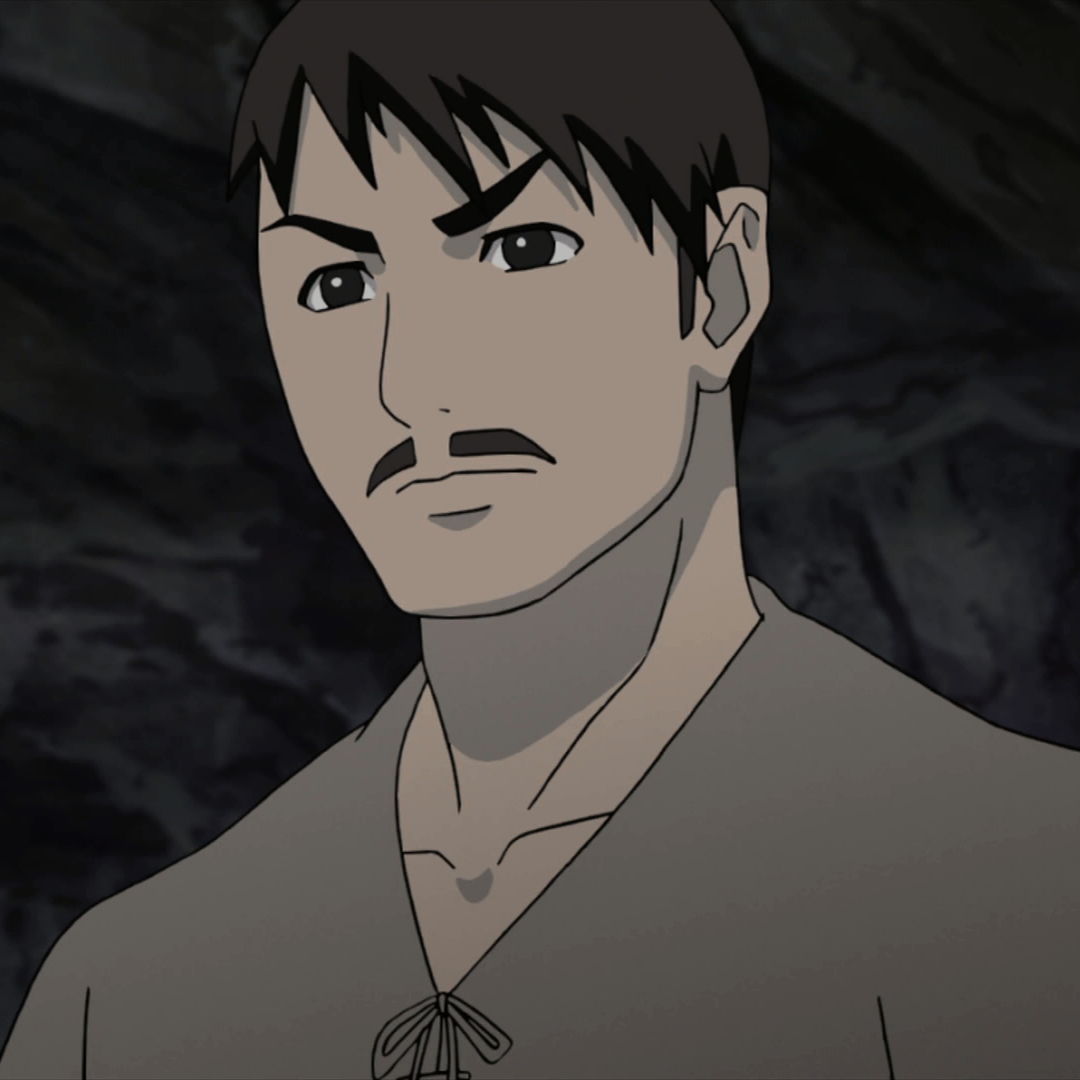

Image 1 information:
 - Dimensions: (937, 937)
 - Format: PNG
 - Mode: RGB
 - Caption: a man in a hoodie with a fire in the background


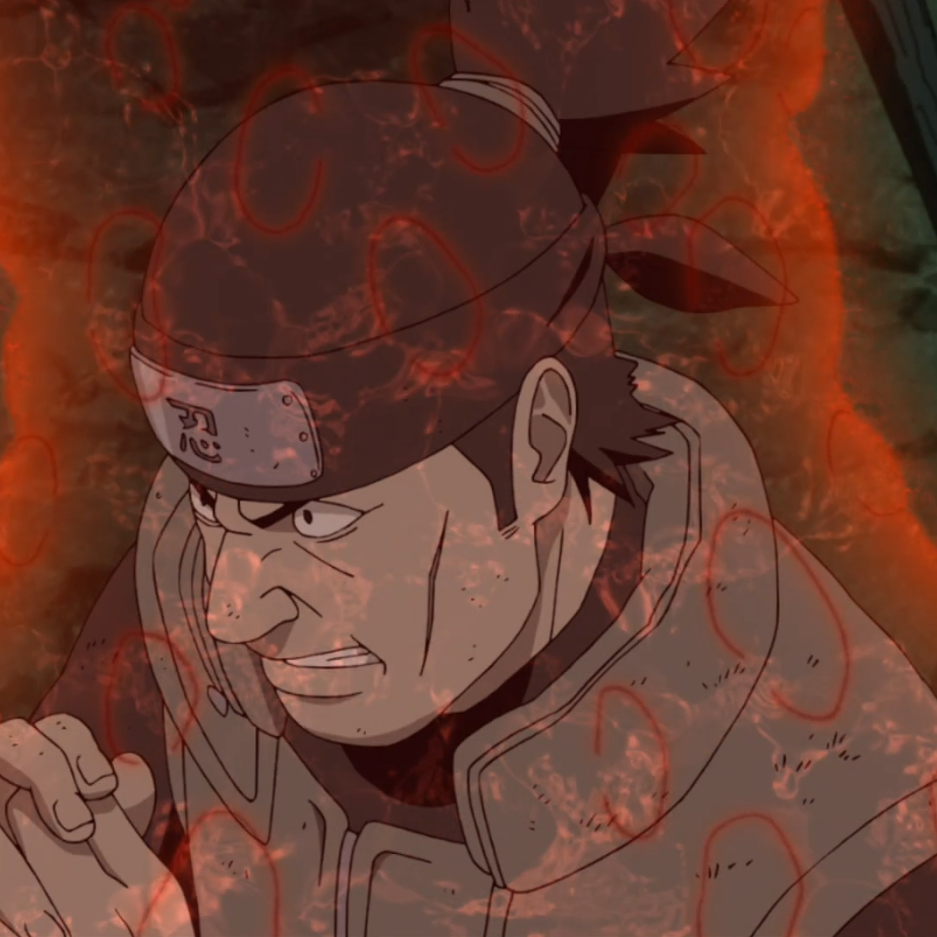

Image 2 information:
 - Dimensions: (700, 700)
 - Format: PNG
 - Mode: RGB
 - Caption: a man with a red hair and a black shirt


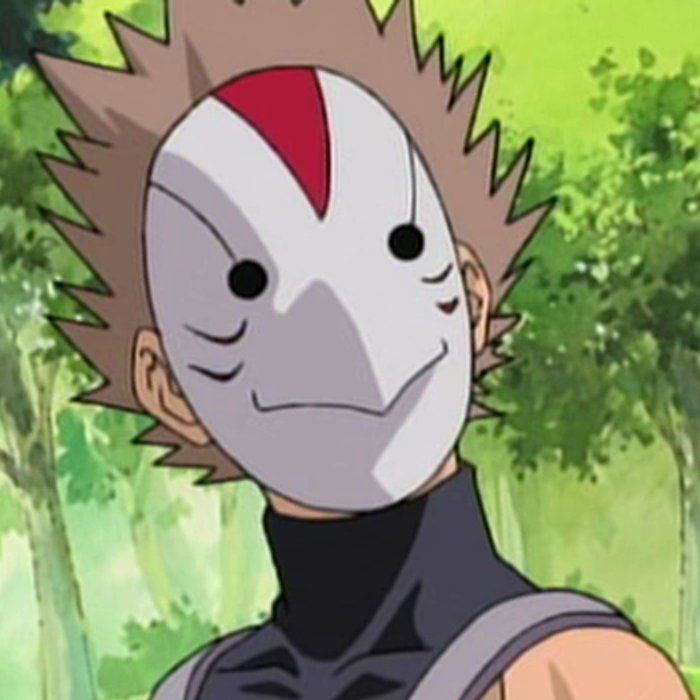

In [5]:
from datasets import load_dataset
import numpy as np
from PIL import Image


# Display basic information about the dataset
def dataset_info(ds):
    # Number of examples in the dataset
    num_examples = len(ds)
    print(f"Number of examples in the dataset: {num_examples}")

    # Get the size of the first image to understand the image dimensions
    first_image = ds[0]['image']
    image_size = first_image.size
    print(f"Image dimensions (width x height) of the first image: {image_size}")

    # Check if all images have the same size
    consistent_size = all(image.size == image_size for image in ds['image'])
    if consistent_size:
        print(f"All images have the same size: {image_size}")
    else:
        print("Images have varying sizes.")

    # Display an example caption
    first_caption = ds[0]['text']
    print(f"Example caption: {first_caption}")

    # Image format and mode
    image_format = first_image.format
    image_mode = first_image.mode
    print(f"Image format: {image_format}")
    print(f"Image mode: {image_mode}")

# Execute the function
dataset_info(ds)

# To further explore the dataset, display information for a few images
def display_image_info(ds, idx):
    image = ds[idx]['image']
    caption = ds[idx]['text']
    
    print(f"Image {idx} information:")
    print(f" - Dimensions: {image.size}")
    print(f" - Format: {image.format}")
    print(f" - Mode: {image.mode}")
    print(f" - Caption: {caption}")
    
    # Display the image
    image.show()

# Example: Display info and show the first 3 images
for i in range(3):
    display_image_info(ds, i)


From the output, we can conclude that the dataset contains 1,221 examples, each comprising an image and a corresponding caption. The images in the dataset are in PNG format and use the RGB color mode. However, the images vary in size, with dimensions ranging from 700x700 to 1080x1080 pixels. This variability in image dimensions means we will need to preprocess the images to ensure they have a consistent size for training, typically by resizing them to a standard resolution (e.g., 512x512 pixels) suitable for input into the Stable Diffusion model. The captions describe visual aspects of the images, such as "a man with dark hair and brown eyes" or "a man in a hoodie with a fire in the background," which will be used to condition the model during fine-tuning.

In this project, data augmentation is essential because our dataset is relatively small and diverse, with variations in image content and size. By augmenting the data, we create more variety, helping the model to better generalize and handle different visual scenarios, which is crucial for generating high-quality Naruto-themed images. This process also helps prevent overfitting, ensuring the model learns to generate images that align with diverse prompts, even when faced with real-world variations like dynamic lighting and complex backgrounds.

For future implication, to improve model performance in generating Naruto-themed images, consider incorporating more diverse transformations like `RandomRotation` and `RandomPerspective`, varying the intensity of augmentations, and using automated techniques like AutoAugment. Additionally, combining augmentations and applying domain-specific effects that mimic the anime style could lead to richer training data. These improvements can help the model generalize better, reducing overfitting, and ensuring it performs well in generating high-quality, diverse images under various real-world scenarios. This approach could also be extended to other domains, improving generative models across different types of visual content.

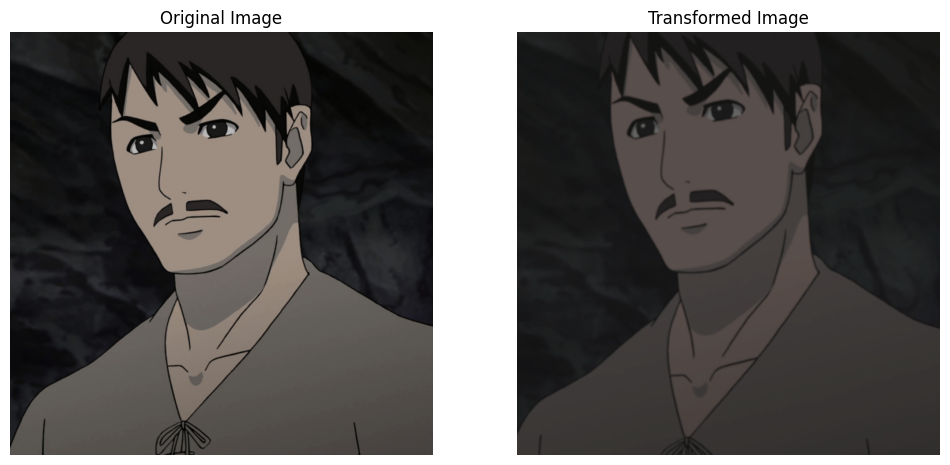

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms


import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.RandomResizedCrop(512, scale=(0.8, 1.0)),  # Randomly crop the image to a random size and aspect ratio, then resize it to 512x512
    #transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    #transforms.RandomRotation(15),  # Randomly rotate the image by up to 15 degrees
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1),  # Randomly change the brightness, contrast, saturation, and hue
    #transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Randomly translate the image by up to 10%
    transforms.RandomGrayscale(p=0.1),  # Randomly convert the image to grayscale with a probability of 10%
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),  # Apply Gaussian blur with random sigma
    transforms.Resize((512, 512)),  # Resize the image to 512x512
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize([0.5], [0.5]),  # Normalize the image with mean=0.5 and std=0.5
])


# Function to visualize images before and after transformation
def visualize_transformation(example_idx):
    # Get the original image
    original_image = ds[example_idx]['image']

    # Apply the transformation
    transformed_image = transform(original_image)

    # Convert the transformed tensor back to an image for visualization
    transformed_image_np = transformed_image.numpy().transpose(1, 2, 0)
    transformed_image_np = (transformed_image_np * 0.5) + 0.5  # Re-normalize to [0, 1] for visualization

    # Plot the original and transformed images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(original_image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(transformed_image_np)
    ax[1].set_title("Transformed Image")
    ax[1].axis("off")
    
    plt.show()

# Visualize the first example (change the index to visualize other examples)
visualize_transformation(0)


We loaded a Naruto-themed dataset, applied image preprocessing and text tokenization, and then prepared the data for training by creating a DataLoader with batch processing and shuffling.

In [7]:
ds = load_dataset("lambdalabs/naruto-blip-captions", split='train')  # Load the Naruto BLIP captions dataset, using the training split

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512 pixels to match the model's input requirements
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize([0.5], [0.5]),  # Normalize images to have pixel values in the range [-1, 1] for better model performance
])

def preprocess_data(examples):
    images = [transform(image.convert("RGB")) for image in examples['image']]  # Apply the transformations to each image and convert them to RGB
    tokens = tokenizer(examples['text'], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")  # Tokenize the text captions with padding and truncation
    return {
        "pixel_values": torch.stack(images),  # Stack the transformed images into a single tensor for the batch
        "input_ids": tokens.input_ids,  # Token IDs for the text inputs
        "attention_mask": tokens.attention_mask,  # Attention masks to ignore padding tokens in the text inputs
    }

ds.set_transform(preprocess_data)  # Set the custom transformation function to be applied to each batch of data
dataloader = DataLoader(ds, batch_size=4, shuffle=True)  # Create a DataLoader to batch and shuffle the dataset for training


Repo card metadata block was not found. Setting CardData to empty.


Next, **IMPORTANT STEP** we fine-tuned a Stable Diffusion model using a specific dataset by setting up a training loop that iterates over multiple epochs. We loaded the necessary components, including the VAE, UNet, and text encoder, and applied gradient accumulation to efficiently manage memory during training. The model was trained by predicting noise added to the latent representations of images, using Mean Squared Error (MSE) loss to optimize the weights. After each epoch, we validated the model, generated an image based on a sample prompt, and saved the fine-tuned UNet model. Finally, we managed GPU memory usage by clearing it after training.

An error occurred while trying to fetch OFA-Sys/small-stable-diffusion-v0: OFA-Sys/small-stable-diffusion-v0 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The config attributes {'predict_epsilon': True} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/306 [00:00<?, ?it/s]

Epoch 2/3, Training Loss: 0.0515772707918598


  0%|          | 0/306 [00:00<?, ?it/s]

safety_checker/model.safetensors not found


Epoch 2/3, Validation Loss: 0.1030201262070073


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:201: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.30.0",
  "algorithm_type": "dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "dynamic_thresholding_ratio": 0.995,
  "lower_order_final": true,
  "num_train_timesteps": 1000,
  "predict_epsilon": true,
  "prediction_type": "epsilon",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": false,
  "solver_order": 2,
  "solver_type": "midpoint",
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloa

  0%|          | 0/50 [00:00<?, ?it/s]

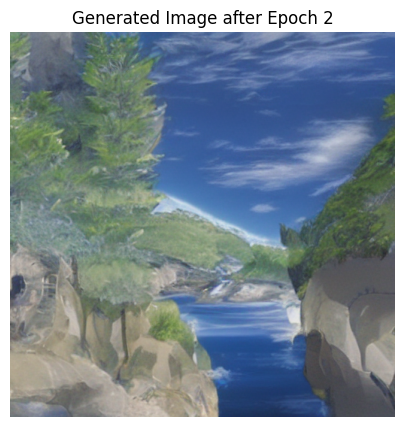

  0%|          | 0/306 [00:00<?, ?it/s]

Epoch 3/3, Training Loss: 0.04912079340973077


  0%|          | 0/306 [00:00<?, ?it/s]

safety_checker/model.safetensors not found


Epoch 3/3, Validation Loss: 0.09408772171907176


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

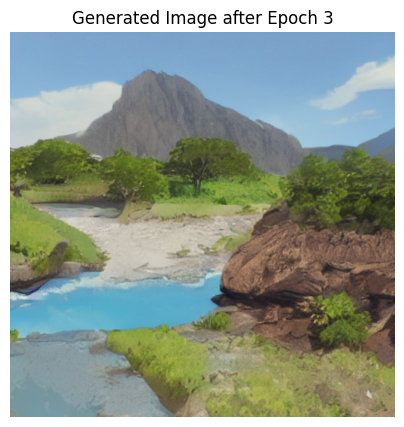

In [8]:
# Set VAE and Text Encoder to evaluation mode to freeze them
vae.eval()  # VAE is used only for encoding/decoding, no training needed
text_encoder.eval()  # Text Encoder is used only for generating text embeddings, no training needed

# For training only the U-Net model
from IPython.display import clear_output  # Utility to clear the output in Jupyter notebooks
import torch
from torch.nn import DataParallel  # Allows for parallelizing model training across multiple GPUs
import matplotlib.pyplot as plt  # For displaying generated images
from tqdm.auto import tqdm  # Progress bar for loops

# Hyperparameters
model_id = "OFA-Sys/small-stable-diffusion-v0"  # Identifier for the pre-trained Stable Diffusion model
batch_size = 4  # Number of samples per batch
learning_rate = 5e-5  # Learning rate for the optimizer
num_epochs = 3  # Total number of training epochs
accumulation_steps = 2  # Accumulate gradients over this many batches to simulate a larger batch size
validation_split = 0.2  # Fraction of the dataset to use for validation
seed = 42  # Seed for reproducibility
start_epoch = 1  # Start training from this epoch (useful for resuming training)

# Set random seed for reproducibility
torch.manual_seed(seed)

# Set up the device (using DataParallel for multi-GPU support)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
cpu_device = torch.device("cpu")  # CPU device for components that do not fit on the GPU

# Load the VAE, U-Net, and Text Encoder components
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae").to(cpu_device)  # Load VAE on CPU to save GPU memory
unet = UNet2DConditionModel.from_pretrained("fine-tuned-unet")  # Load the fine-tuned U-Net model
text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder").to(device)  # Load text encoder on GPU
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")  # Load tokenizer for text input
scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")  # Load scheduler to guide the diffusion process

# Use DataParallel to utilize multiple GPUs for training
unet = DataParallel(unet).to(device)
text_encoder = DataParallel(text_encoder).to(device)

# Initialize the AdamW optimizer
optimizer = AdamW(unet.parameters(), lr=learning_rate)  # Only include U-Net parameters

# Training and Validation Loop
for epoch in range(start_epoch, num_epochs + 1):
    unet.train()  # Set U-Net to training mode
    running_loss = 0.0

    # Iterate through the dataset with the DataLoader
    for i, batch in enumerate(tqdm(dataloader)):
        # Extract batch data and move to appropriate devices
        pixel_values = batch["pixel_values"].to(cpu_device)
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        optimizer.zero_grad()  # Zero the gradients for the optimizer

        # Forward pass through the text encoder to get text embeddings
        with torch.no_grad():  # Ensure text encoder is not updated
            text_embeddings = text_encoder(input_ids, attention_mask=attention_mask)[0]

        # Encode the images using VAE (done on CPU)
        with torch.no_grad():  # Ensure VAE is not updated
            latents = vae.encode(pixel_values).latent_dist.sample()
            latents = latents * 0.18215  # Apply scaling to latent representations

        # Move latents to GPU for further processing
        latents = latents.to(device)

        # Add noise to the latent vectors using the scheduler
        noise = torch.randn_like(latents).to(device)
        timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (latents.shape[0],), device=device).long()
        noisy_latents = scheduler.add_noise(latents, noise, timesteps)

        # Predict the noise using the U-Net model
        noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings)

        # Access the tensor directly from the UNet2DConditionOutput class
        noise_pred = noise_pred.sample

        # Ensure noise_pred is now a tensor
        if isinstance(noise_pred, torch.Tensor):
            # Compute the loss (Mean Squared Error) between predicted and actual noise
            loss = torch.nn.functional.mse_loss(noise_pred, noise)
            loss = loss / accumulation_steps  # Adjust loss for gradient accumulation

            # Backpropagation: accumulate gradients
            loss.backward()

            # Update model weights after accumulating the gradients
            if (i + 1) % accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()

            running_loss += loss.item()  # Track the running loss

        else:
            raise ValueError("Expected noise_pred to be a torch.Tensor, but got something else.")  # Error handling if the output is not a tensor

    # Print the average training loss for the epoch
    print(f"Epoch {epoch}/{num_epochs}, Training Loss: {running_loss / len(dataloader)}")

    # Validation loop (if validation frequency is met)
    if (epoch + 1) % 1 == 0:  # Perform validation every epoch
        unet.eval()  # Set U-Net to evaluation mode
        val_loss = 0.0

        with torch.no_grad():  # Disable gradient calculation for validation
            for batch in tqdm(dataloader):
                # Extract and move batch data to appropriate devices
                pixel_values = batch["pixel_values"].to(cpu_device)
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)

                # Forward pass through the text encoder and VAE
                with torch.no_grad():  # Ensure text encoder is not updated
                    text_embeddings = text_encoder(input_ids, attention_mask=attention_mask)[0]
                with torch.no_grad():  # Ensure VAE is not updated
                    latents = vae.encode(pixel_values).latent_dist.sample()
                    latents = latents * 0.2  # Apply latent scaling
                latents = latents.to(device)

                # Add noise and predict it using U-Net
                noise = torch.randn_like(latents).to(device)
                timesteps = torch.randint(0, scheduler.config.num_train_timesteps, (latents.shape[0],), device=device).long()
                noisy_latents = scheduler.add_noise(latents, noise, timesteps)

                noise_pred = unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings)

                # Access the tensor directly from the UNet2DConditionOutput class
                noise_pred = noise_pred.sample

                # Compute the validation loss (Mean Squared Error)
                if isinstance(noise_pred, torch.Tensor):
                    loss = torch.nn.functional.mse_loss(noise_pred, noise)
                    val_loss += loss.item()  # Accumulate validation loss
                else:
                    raise ValueError("Expected noise_pred to be a torch.Tensor, but got something else.")  # Error handling if the output is not a tensor

        print(f"Epoch {epoch}/{num_epochs}, Validation Loss: {val_loss / len(dataloader)}")  # Print average validation loss

    # Generate and display a single image with a prompt after each epoch
    pipeline = StableDiffusionPipeline.from_pretrained(
        model_id,
        vae=vae,
        unet=unet.module,  # Unwrap the DataParallel model
        text_encoder=text_encoder.module,  # Unwrap the DataParallel model
        tokenizer=tokenizer,
        scheduler=scheduler,
    ).to(device)

    prompt = "A beautiful landscape with mountains and a river"  # Example prompt for image generation
    generated_image = pipeline(prompt).images[0]  # Generate an image based on the prompt

    # Display the generated image
    plt.figure(figsize=(5, 5))
    plt.imshow(generated_image)
    plt.title(f"Generated Image after Epoch {epoch}")
    plt.axis("off")
    plt.show()

    # Save the fine-tuned UNet model after each epoch with a unique name
    unet.module.save_pretrained(f"fine-tuned-unet-epoch-{epoch}")

# Clear the GPU memory after training (optional step to free up memory)
torch.cuda.empty_cache()

The results show that the training process for the Stable Diffusion model completed successfully across three epochs, with the training loss slightly decreasing from 0.0516 in the second epoch to 0.0491 in the third epoch, indicating some improvement in model performance. However, during the validation phase, warnings and errors were encountered, including missing files such as `safety_checker/model.safetensors` (can be ignored for sure) and outdated configuration settings in the PNDMScheduler. Despite these issues, the validation loss also decreased, suggesting the model's ability to generalize improved slightly, but the missing safety checker could lead to potential risks if the generated images were to be deployed without further checks. 

In [9]:
# Print the keys for the first example in the dataset
print(ds[0].keys())


dict_keys(['pixel_values', 'input_ids', 'attention_mask'])


We loaded the latest fine-tuned model, generated images based on both dataset and custom prompts, and added the prompts as titles to the images for display.

An error occurred while trying to fetch OFA-Sys/small-stable-diffusion-v0: OFA-Sys/small-stable-diffusion-v0 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The config attributes {'predict_epsilon': True} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureW

Dataset Prompts

Prompt 1 (Dataset): two people with headphones on their heads



  0%|          | 0/100 [00:00<?, ?it/s]

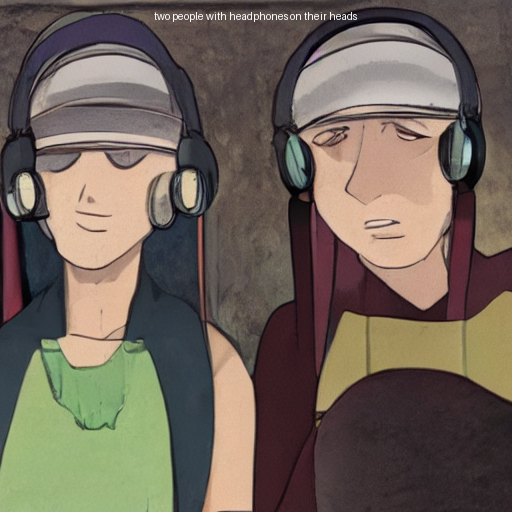

Prompt 2 (Dataset): a deer in the middle of a forest



  0%|          | 0/100 [00:00<?, ?it/s]

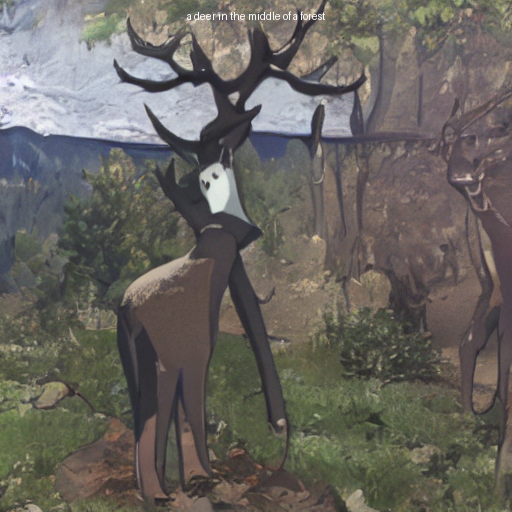

Prompt 3 (Dataset): a girl with brown hair and a white shirt



  0%|          | 0/100 [00:00<?, ?it/s]

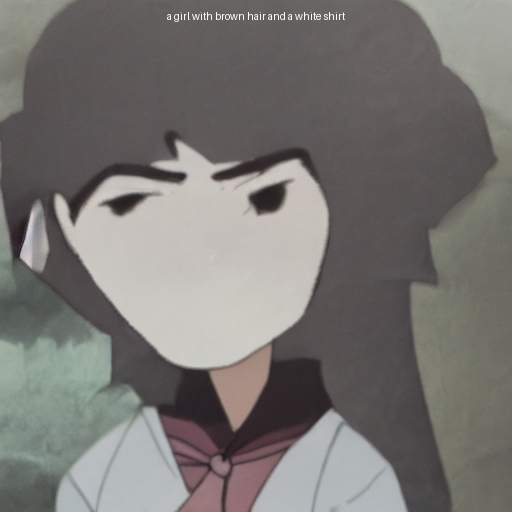

Prompt 4 (Dataset): two pokemons sitting on top of a cloud



  0%|          | 0/100 [00:00<?, ?it/s]

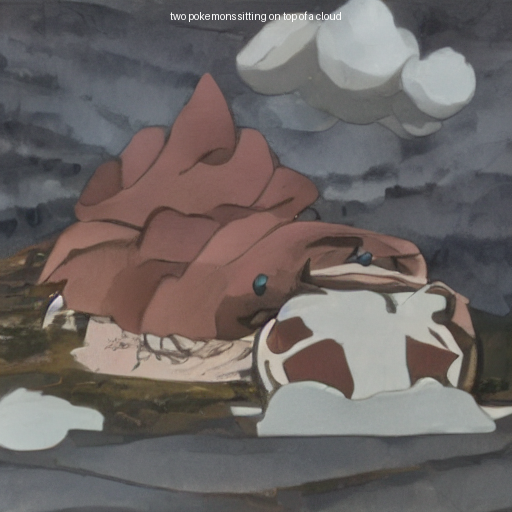

Prompt 5 (Dataset): two people standing next to each other people



  0%|          | 0/100 [00:00<?, ?it/s]

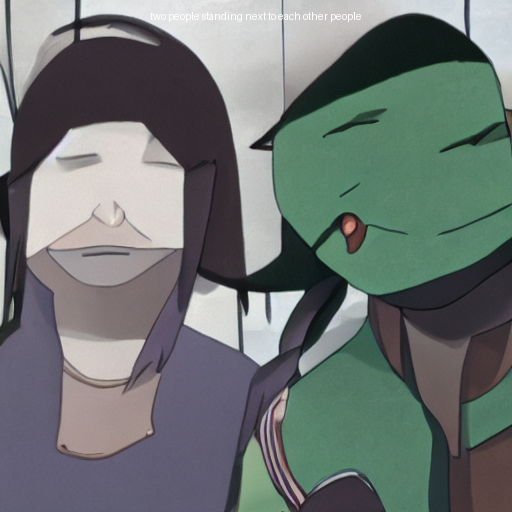

Custom Prompts

Prompt 1 (Custom): A person creating a burst of energy in a forest



  0%|          | 0/100 [00:00<?, ?it/s]

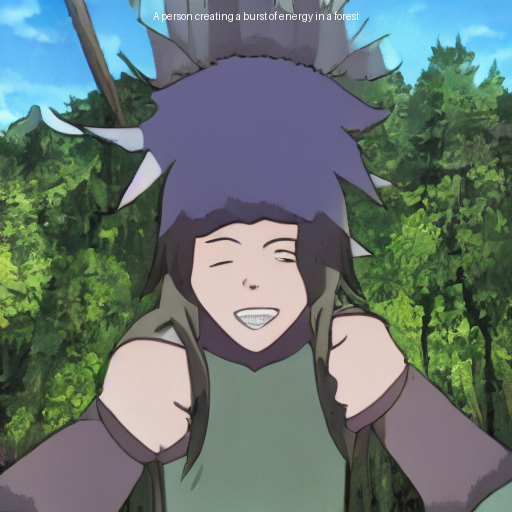

Prompt 2 (Custom): A figure using lightning under a cloudy sky



  0%|          | 0/100 [00:00<?, ?it/s]

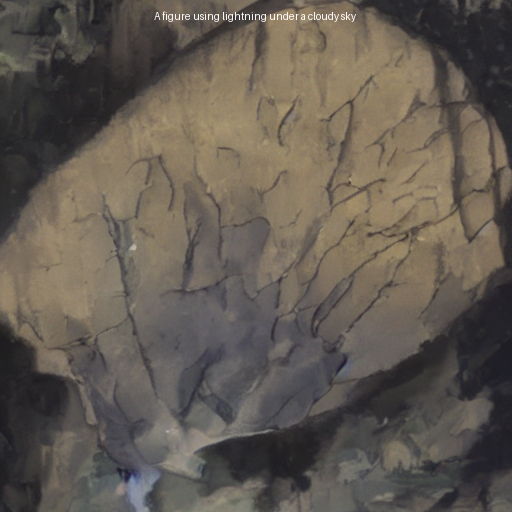

Prompt 3 (Custom): A healer helping an injured person after a battle



  0%|          | 0/100 [00:00<?, ?it/s]

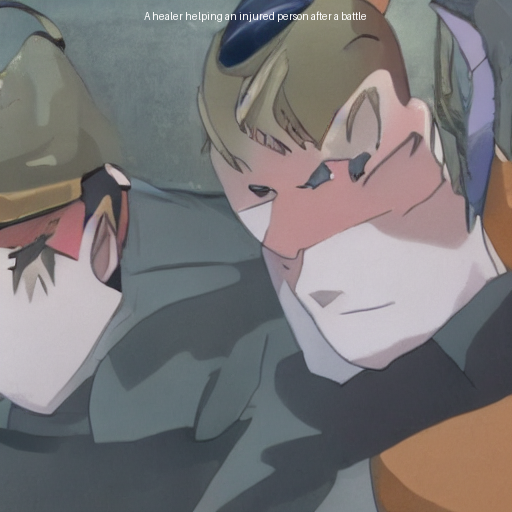

Prompt 4 (Custom): A person standing on a cliff during a storm



  0%|          | 0/100 [00:00<?, ?it/s]

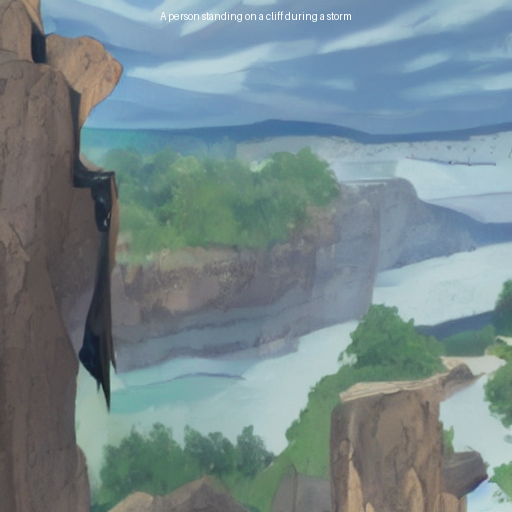

Prompt 5 (Custom): A person using sand to make a shield



  0%|          | 0/100 [00:00<?, ?it/s]

In [1]:
import os
import random
from transformers import CLIPFeatureExtractor, CLIPTextModel, CLIPTokenizer
from diffusers import StableDiffusionPipeline, UNet2DConditionModel, AutoencoderKL, PNDMScheduler
from PIL import ImageDraw, ImageFont
import torch
from datasets import load_dataset

# Define the model ID and other paths
model_id = "OFA-Sys/small-stable-diffusion-v0"
save_directory = "./"  # Adjust this to your actual save path

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Find the latest saved UNet model by epoch
saved_models = [d for d in os.listdir(save_directory) if d.startswith("fine-tuned-unet-epoch-")]
latest_model = max(saved_models, key=lambda x: int(x.split("-")[-1]))  # Extract the epoch number and find the max

# Load the fine-tuned UNet model from the saved directory
unet = UNet2DConditionModel.from_pretrained("fine-tuned-unet-epoch-3").to(device)

# Load the VAE, text encoder, tokenizer, and scheduler from the original model
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae").to(device)
text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder="text_encoder").to(device)
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")
scheduler = PNDMScheduler.from_pretrained(model_id, subfolder="scheduler")

# Load the feature extractor
feature_extractor = CLIPFeatureExtractor.from_pretrained(model_id, subfolder="feature_extractor")

# Load the fine-tuned components into the pipeline
pipeline = StableDiffusionPipeline(
    vae=vae,
    unet=unet,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    scheduler=scheduler,
    feature_extractor=feature_extractor,
    safety_checker=None,  # Set safety_checker to None if you do not want to use it
)

# Move the pipeline to GPU
pipeline = pipeline.to(device)

# Load the dataset
ds = load_dataset("lambdalabs/naruto-blip-captions", split='train')

# Randomly select 5 prompts from the dataset
num_samples = 5
dataset_prompts = []
for i in range(num_samples):
    random_index = random.randint(0, len(ds) - 1)
    prompt = ds[random_index]['text']
    dataset_prompts.append(prompt)

# Simplified custom prompts
custom_prompts = [
    "A person creating a burst of energy in a forest",
    "A figure using lightning under a cloudy sky",
    "A healer helping an injured person after a battle",
    "A person standing on a cliff during a storm",
    "A person using sand to make a shield"
]

# Combine dataset prompts and custom prompts
all_prompts = dataset_prompts + custom_prompts

def add_title_to_image(image, text):
    """Adds a title to the generated image at the top center."""
    draw = ImageDraw.Draw(image)
    
    # Use a larger font size for the title
    try:
        font = ImageFont.truetype("arial.ttf", 36)  # Use a TrueType font if available
    except IOError:
        font = ImageFont.load_default()  # Fallback to default font if Arial is not available

    # Calculate text size and position using textbbox
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    width, height = image.size
    text_position = ((width - text_width) // 2, 10)  # Centered at the top with a small margin

    # Add text to image
    draw.text(text_position, text, font=font, fill=(255, 255, 255))
    return image

# Generate and display images with labels, and print prompts in markdown
print("Dataset Prompts\n")
for i, prompt in enumerate(dataset_prompts):
    print(f"Prompt {i+1} (Dataset): {prompt}\n")
    # Generate the image
    image = pipeline(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]
    # Add the prompt as a title on the image
    image = add_title_to_image(image, prompt)
    # Display the image
    image.show()

print("Custom Prompts\n")
for i, prompt in enumerate(custom_prompts):
    print(f"Prompt {i+1} (Custom): {prompt}\n")
    # Generate the image
    image = pipeline(prompt, num_inference_steps=100, guidance_scale=7.5).images[0]
    # Add the prompt as a title on the image
    image = add_title_to_image(image, prompt)
    # Display the image
    image.show()


These warnings primarily highlight issues with  deprecated features, outdated configurations, and the potential risks of disabling the safety checker. So, let's ignore for now and can be figured out in future implications.

By observing the generated images, I am impressed! The model seems to produce highly stylized and abstract images rather than realistic and detailed representations of the prompts. While some of the elements from the prompts are recognizable, the details are sometimes vague, and the images lean towards an artistic interpretation rather than a precise depiction. This suggests that the model may need further fine-tuning or additional training data to improve its ability to generate more accurate and detailed images based on specific prompts.

## Conclusion

To improve our project and enhance the quality and accuracy of the images generated by our model, we should consider several strategies. First, we can increase the dataset size and diversity by gathering more data. Collecting additional images and captions, especially those covering a wider range of scenarios, will help our model learn to generate more accurate and varied images. Including high-quality, diverse images with different styles, lighting conditions, and perspectives will further enhance the model's training and effectiveness. Next, refining our data preprocessing and augmentation processes is crucial. We can introduce more sophisticated data augmentation techniques, such as rotation, scaling, and color adjustments, to help the model generalize better and learn from a broader set of variations. Ensuring consistent image quality by standardizing resolution and preprocessing methods will prevent the model from learning from low-quality or inconsistently processed images, leading to better overall performance.

Optimizing the model architecture and training process is another key step. We might consider using a larger or different pretrained model, such as a more powerful version of Stable Diffusion, or even fine-tuning a model like DALL-E or Midjourney, which may have superior capabilities for generating detailed images. Increasing the number of training epochs could help the model capture finer details, though we need to monitor for overfitting. Fine-tuning hyperparameters like learning rates, batch sizes, and gradient accumulation steps will also be essential in improving the model's performance. We should also focus on enhancing the text-image matching by using better text encodings, which could help the model better understand and interpret the content of the prompts, leading to more accurate image generation. Introducing contextual training, where the model generates images based on a sequence of related prompts, could allow the model to grasp the context and nuances of more complex prompts more effectively. Incorporating feedback mechanisms could further refine the model's outputs. By introducing a human-in-the-loop feedback system, where users can rate or modify generated images during training, we can guide the model to improve based on human preferences. Additionally, iterative refinement—where the model's generated images are used as part of the training set in a cyclical manner—could help the model improve its outputs progressively.Improving the loss function is another area we can explore. Developing or using more complex loss functions that better capture the quality of generated images, such as perceptual loss, could help the model understand and retain finer visual details. Incorporating adversarial training through a Generative Adversarial Network (GAN) approach, where a discriminator model critiques the images, could push the model to produce more realistic outputs.

We should also adjust the image generation parameters, experimenting with the number of inference steps and the guidance scale, as these directly impact the fidelity and creativity of the generated images. For more complex scenes, using multiple or weighted prompts could guide the model more effectively in generating the desired outcomes. Addressing configuration and technical issues is essential to ensure smooth operation. We need to update or correct any configurations, such as the scheduler's settings, and ensure all necessary files, like the safety checker, are properly set up. Using the latest versions of libraries will help us benefit from performance improvements, bug fixes, and new features. Finally, we could consider specialized training by focusing on specific styles. If we want the model to produce images in a particular style, such as anime or photorealism, fine-tuning the model on a style-specific dataset could yield better results. For highly specific outputs, like Naruto-style images, domain-specific fine-tuning with additional style-related augmentations could further enhance the model's capabilities. By implementing these strategies, we can significantly improve our model's ability to generate higher-quality, more accurate images that align closely with the given prompts, making our project more robust and effective.